In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load each file to inspect its contents
train_df = pd.read_csv('D:/house pricing/train.csv')
test_df = pd.read_csv('D:/house pricing/test.csv')
submission_df = pd.read_csv('D:/house pricing/sample_submission.csv')

# Display the first few rows of each DataFrame
print("Train DataFrame:")
print(train_df.head())
print(train_df.info())
print(train_df.isnull().sum())


print("\nTest DataFrame:")
print(test_df.head())
print(train_df.info())
print(train_df.isnull().sum())


print("\nSample Submission DataFrame:")
print(submission_df.head())
print(train_df.info())
print(train_df.isnull().sum())




Train DataFrame:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1

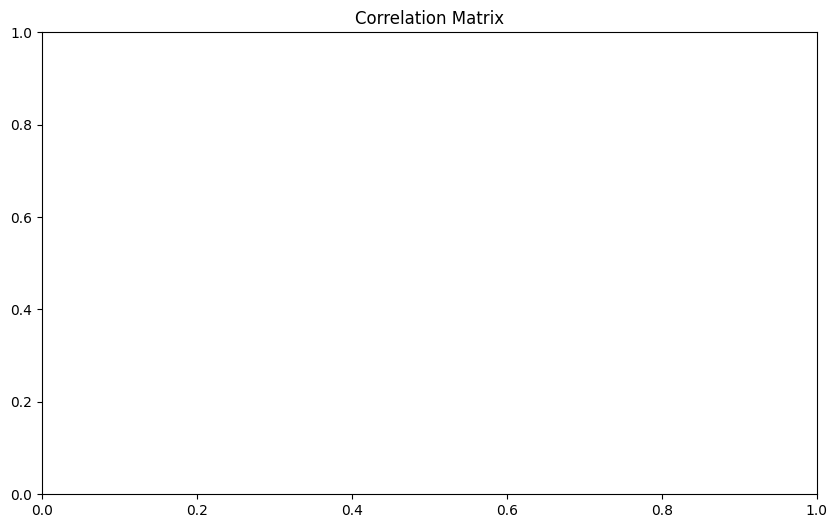

In [34]:
import matplotlib.pyplot as plt

# Check for missing values
print(train_df.isnull().sum())

# Display the information of the dataset
print(train_df.info())

# Visualize the correlation between features and target variable
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix')
# Select features (Square Footage, Number of Bedrooms, Number of Bathrooms)
# Assuming 'GrLivArea' is the square footage, 'BedroomAbvGr' is the number of bedrooms, and 'FullBath' is the number of bathrooms.
X = train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']].copy()

y = train_df['SalePrice']

plt.show()



In [35]:
# Handle missing values
X.fillna(X.median(), inplace=True)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)



LinearRegression()

In [36]:
# Make predictions on the validation set
y_pred = model.predict(X_val)


Root Mean Squared Error: 52975.71771338122


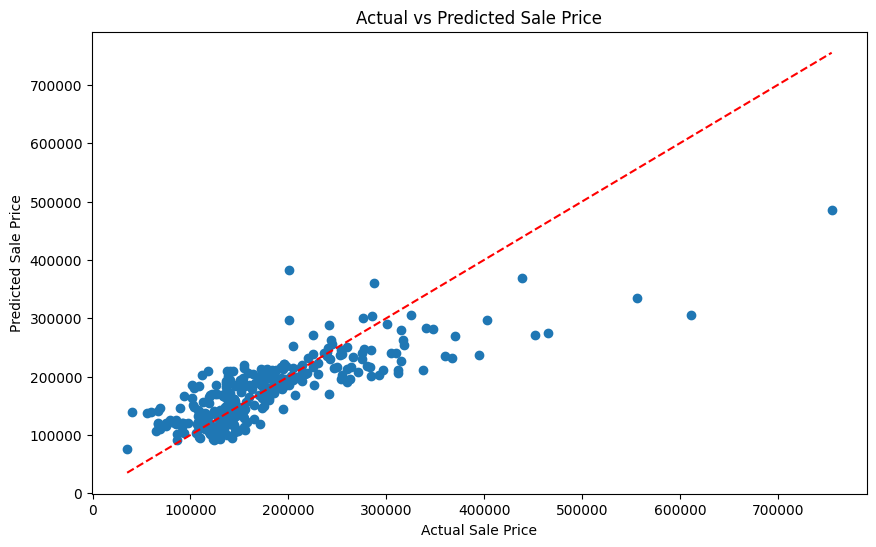

In [37]:
# Calculate Mean Squared Error and RMSE
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Visualize Actual vs Predicted Sale Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Diagonal line
plt.show()
